# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Data Preprocessing

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Sex- Gender of patient Male=1,Female=0

Age-Age of patient

Diabetes- 0=No,1=Yes

Anaemia- 0=No,1=Yes

High_blood_pressure- 0=No,1=Yes

Smoking- 0=No,1=Yes

DEATH_EVENT- 0==No,1=Yes

# Is Age and Sex an indicator for Death Event?

In [7]:
# age distribution
hist_data=[data['age'].values]
group_labels=['age']
fig=ff.create_distplot(hist_data,group_labels)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

In [8]:
fig = px.box(data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [9]:
male = data[data["sex"]==1]
female = data[data["sex"]==0]

male_survi = male[data["DEATH_EVENT"]==0]
male_not = male[data["DEATH_EVENT"]==1]
female_survi = female[data["DEATH_EVENT"]==0]
female_not = female[data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[data["DEATH_EVENT"]==0]),len(male[data["DEATH_EVENT"]==1]),
         len(female[data["DEATH_EVENT"]==0]),len(female[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

# Gender Factor Analysis

In [11]:
surv = data[data["DEATH_EVENT"]==0]["age"]
not_surv = data[data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [12]:
fig=px.violin(data,y="age",x="sex",color="DEATH_EVENT",box=True,points="all",hover_data=data.columns)

fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()



In [14]:
fig = px.violin(data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

In [15]:
fig = px.violin(data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=data.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

# Other Factors

In [17]:
fig = px.histogram(data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()


In [18]:
fig = px.histogram(data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()

In [19]:
fig = px.histogram(data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()


In [20]:
fig = px.histogram(data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=data.columns)
fig.show()

In [21]:
fig = px.histogram(data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=data.columns)
fig.show()


# Distribution plots Survived and Not Survived

In [22]:
surv = data[data['DEATH_EVENT']==0]['serum_sodium']
not_surv = data[data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [23]:
surv = data[data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = data[data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [24]:
surv = data[data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = data[data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

# Pie Charts

In [26]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = data[data['diabetes']==1]
diabetes_no = data[data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [27]:
fig = px.pie(data, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()


In [29]:
diabetes_yes_survi = diabetes_yes[data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[data["DEATH_EVENT"]==0]),len(diabetes_yes[data["DEATH_EVENT"]==1]),
         len(diabetes_no[data["DEATH_EVENT"]==0]),len(diabetes_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()


In [30]:
anaemia_yes = data[data['anaemia']==1]
anaemia_no = data[data['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

In [31]:
fig = px.pie(data, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [32]:
anaemia_yes_survi = anaemia_yes[data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[data["DEATH_EVENT"]==0]),len(anaemia_yes[data["DEATH_EVENT"]==1]),
         len(anaemia_no[data["DEATH_EVENT"]==0]),len(anaemia_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

In [33]:
hbp_yes = data[data['high_blood_pressure']==1]
hbp_no = data[data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

In [34]:
fig = px.pie(data, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [35]:
hbp_yes_survi = hbp_yes[data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[data["DEATH_EVENT"]==0]),len(hbp_yes[data["DEATH_EVENT"]==1]),
         len(hbp_no[data["DEATH_EVENT"]==0]),len(hbp_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()


In [36]:
smoking_yes = data[data['smoking']==1]
smoking_no = data[data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

In [37]:
fig = px.pie(data, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [38]:
smoking_yes_survi = smoking_yes[data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[data["DEATH_EVENT"]==0]),len(smoking_yes[data["DEATH_EVENT"]==1]),
         len(smoking_no[data["DEATH_EVENT"]==0]),len(smoking_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

# Heatmap

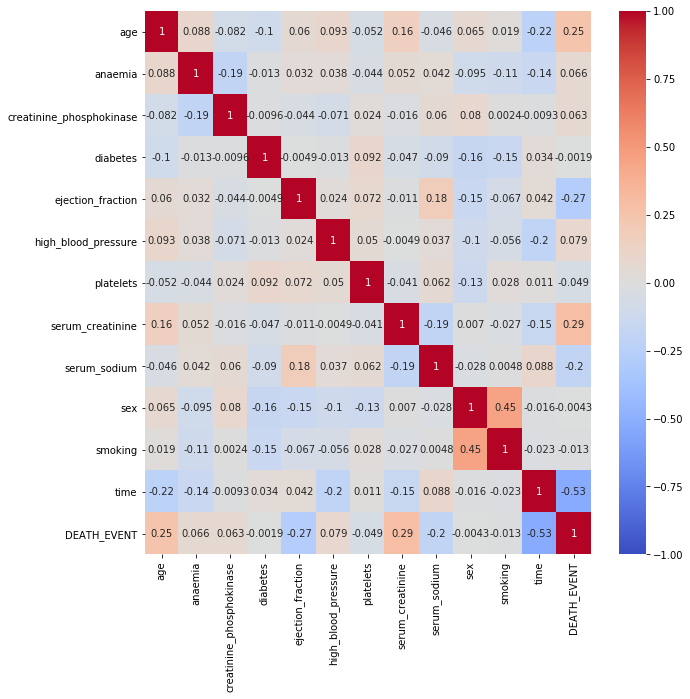

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Data Modeling

In [40]:
Features = ['time','ejection_fraction','serum_creatinine','age']
x = data[Features]
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

In [41]:
accuracy_list = []

In [42]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [43]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))


Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

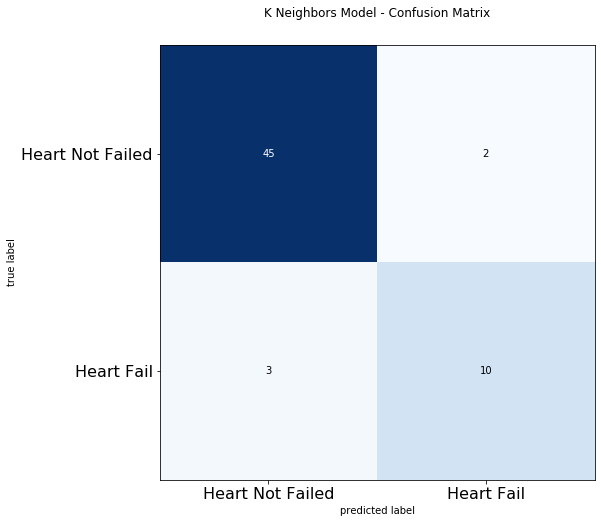

In [44]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [45]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)


In [46]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))


Accuracy of Decision Tree Classifier is :  93.33%


<Figure size 432x288 with 0 Axes>

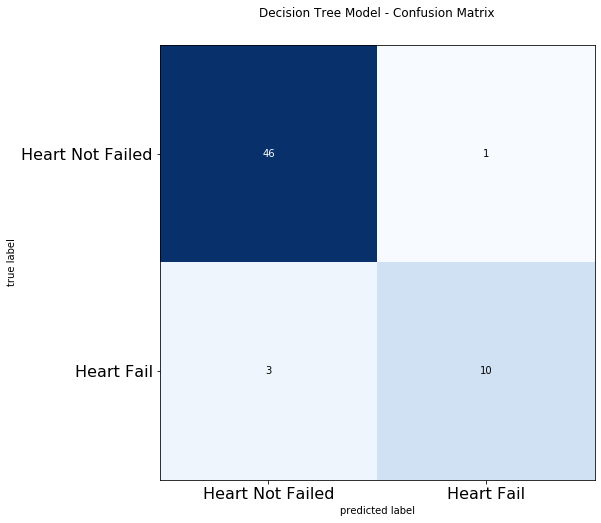

In [47]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()


In [48]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [49]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  96.67%


<Figure size 432x288 with 0 Axes>

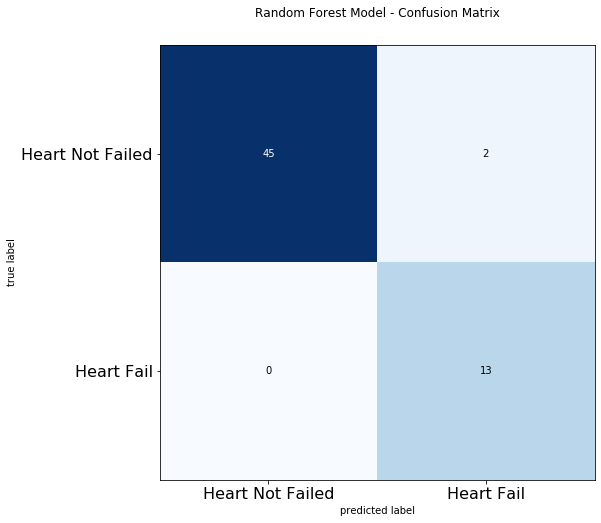

In [50]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [51]:
model_list = ['KNearestNeighbours', 'DecisionTree', 'RandomForest'  ]

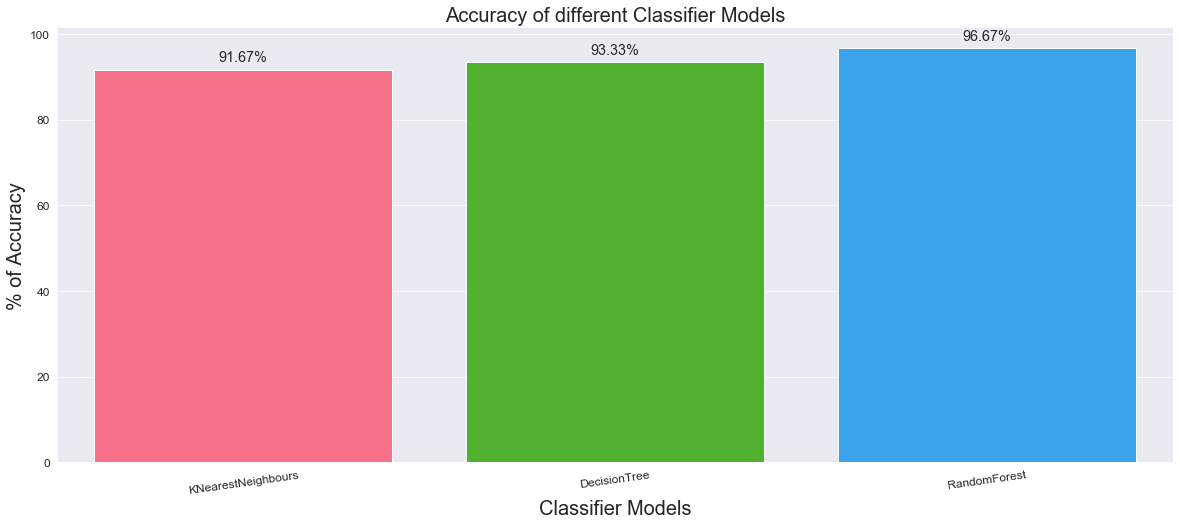

In [52]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()